#  Human Activity Recognition with Smartphones

Our Aim here is to create a model that can predict the Human activity recognition with smartphones.

### OBJECTIVE
- Using  KNeighborsClassifier machine classify the input into the different classes it belongs to. 

### REQUIREMENT
1. Pandas
2. Numpy
3. Matplotlib
4. Scikit Learn

### STEPS :
1. Importing Libraries
2. Exploring the Dataset
3. Exploratory Data Analysis
4. Data Preprocessing
5. Model Building
    >* KNeighborsClassifier
6. Evaluation
7. Conclusion

### DATA
We will be using a [human-activity-recognition-with-smartphones](https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones) from the Kaggle platform which has a very good collection of datasets.

The file we will be using is present in following directory :    ***input\***

### LIBRARIES IMPORTED

In [50]:
"""Import neccessary libraries"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import os
print(os.listdir("input"))

['test.csv', 'train.csv']


### LOAD THE DATASET

In [24]:
"""load the test and training dataset"""

train = shuffle(pd.read_csv("input/train.csv"))
test = shuffle(pd.read_csv("input/test.csv"))

### EXPLORING THE DATASET

In [25]:
"""check for if there are any missing values"""

print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any())

Any missing sample in training set: False
Any missing sample in test set: False


In [26]:
""" CHECK THE FREQUENCY DISTRIBUTION OF THE CLASSES"""

train_outcome = pd.crosstab(index=train["Activity"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


### EXPLORATORY DATA ANALYSIS

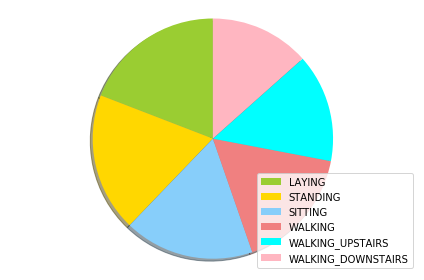

In [27]:
"""VISUALISE THE FREQUENCY DISTRIBUTION OF THE CLASSES"""

# Visualizing Outcome Distribution 
temp = train["Activity"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#PLOT PIE DIAGRAM
labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


### DATA PREPROCESSING

In [28]:
""" CREATE PREDICTORS AND OUTCOME VALUE SET FOR TRAINING AND TESTING SET """

# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test_label = test.Activity.values.astype(object)

# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")


Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561) 



In [29]:
""" ENCODE THE Y_TRAIN AND Y_TEST WITH NUMERICAL LABEL ENCODER"""

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train_label)
ytrain = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
ytest = encoder.transform(Y_test_label)


In [30]:
"""Total Number of Continous and Categorical features in the training set"""

num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 561


In [31]:
"""list all the features in a variable"""
names_of_predictors = list(X_train.columns.values)
names_of_predictors

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [32]:
"""Scale the Train and Test feature set"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(X_train)
xtest  = scaler.transform(X_test)

### MODEL BUILDING

In [33]:
"""Write a function to Train and fit the dataset"""

knn = KNeighborsClassifier(n_neighbors = 24) #setting k= square root of 561
knn.fit(xtrain,ytrain)

In [34]:
"""Write a function to Predict testing dataset """

ypred = knn.predict(xtest)

In [38]:
"""Write the code to find the accuracy on test dataset """

print((accuracy_score(ytest,ypred)*100),'%')

88.87003732609433 %


In [39]:
"""Find the optimal model by varying the no. of neighbors"""

scores = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    scores.append(accuracy_score(ytest,ypred))

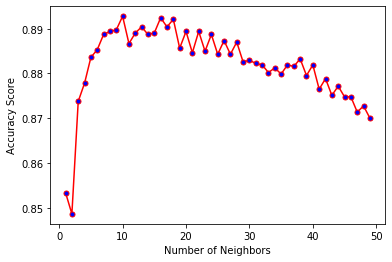

In [41]:
"""plot the accuracy score vs Number of neighbors graph"""

plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)
plt.show()

In [42]:
"""list of all scores"""

scores = np.array(scores)

In [44]:
"""#Final result after training the model"""

print('Optimal No. Of Neighbors: ', scores.argmax()+1)
print('Accuracy Score: '+ str(scores.max()*100), ' %')

Optimal No. Of Neighbors:  10
Accuracy Score: 89.27723108245674  %


### CONCLUSION :

- from the above code we can conclude that KNeighborsClassifier best performs when k= 10

In [46]:
""" Predict the ytest using the best model """

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
Y_pred_label = list(encoder.inverse_transform(ypred))

In [55]:
""" display Confusion matrix """

print(confusion_matrix(Y_test_label,Y_pred_label))

[[513  12  12   0   0   0]
 [  3 403  83   0   0   2]
 [  0  36 496   0   0   0]
 [  0   0   0 487   6   3]
 [  0   0   0  58 315  47]
 [  0   0   0  52   2 417]]


In [56]:
"""Display classification report """

print(classification_report(Y_test_label,Y_pred_label))

                    precision    recall  f1-score   support

            LAYING       0.99      0.96      0.97       537
           SITTING       0.89      0.82      0.86       491
          STANDING       0.84      0.93      0.88       532
           WALKING       0.82      0.98      0.89       496
WALKING_DOWNSTAIRS       0.98      0.75      0.85       420
  WALKING_UPSTAIRS       0.89      0.89      0.89       471

          accuracy                           0.89      2947
         macro avg       0.90      0.89      0.89      2947
      weighted avg       0.90      0.89      0.89      2947



In [57]:
"""Print the testing accuracy score"""

print("Testing set score for Kneighborsclassifier (k=10):",(accuracy_score(ytest,ypred)*100),'%')

Testing set score for Kneighborsclassifier (k=10): 89.27723108245674 %
